In [1]:
import importlib
from src import experiment
from src import plotting

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def default_params():
    """
    Defines the default parameters for the experiment.

    Returns:
        dict: A dictionary containing the default parameter values.
    """
    params = {
        "time_steps": 4000,          # Total number of time steps in the experiment
        "task_dist": "DetPRL",        # Type of task distribution (e.g., Deterministic PRL)
        "init_reward_means": ([1, 0], [1, 0]),  # Initial reward means for each task
        "init_reward_probs": (0.8, 0.2),  # Initial probabilities for task rewards
        "task_reward_probs": None,   # Probabilities for rewards in tasks (optional)
        "n_tasks": 4,               # Number of tasks in the experiment
        "reward_prob": 1.0,          # Probability of receiving a reward
        "reward_var": 0.8,           # Variance of reward noise
        "n_trials": 50,              # Number of trials to average results
        "wI": [0.0, 1e-2,   -0.5e-1],    # List of exploitative weight values for sensitivity sweeps
        "wE": 0.2,                   # Exploratory weight for policy updates
        "alpha": 1e-2,               # Learning rate for value updates
        "tau": 1e-2                  # Entropy regularization coefficient
    }
    return params


In [4]:
# Reload the modules after editing
importlib.reload(experiment)
importlib.reload(plotting)

# Re-import the functions if necessary
from src.experiment import sensitivity_sweep
from src.plotting import plot_results_2cols
# Load default parameters
params = default_params()

# Run the sensitivity analysis, sweeping over wI
histories, environment = sensitivity_sweep(params, sweep_over="wI")

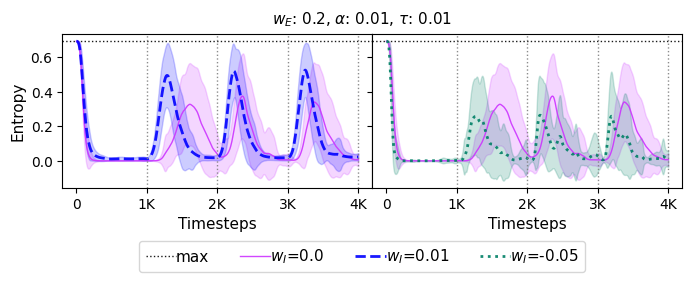

In [5]:
# Reload the modules after editing
importlib.reload(plotting)
# Re-import the functions if necessary
from src.plotting import plot_results_2cols2
# Plot the results
colormaps = [plt.cm.spring, plt.cm.summer, plt.cm.autumn, plt.cm.winter, plt.cm.cool]
n_colors = 1
colors = [colormaps[4](0.8)] + [colormaps[3](v) for v in np.linspace(0., 0.7, n_colors)[::-1]]
colors += [colormaps[1](v) for v in np.linspace(0., 0.6, n_colors)[::-1]]
colors_baseline = [colormaps[4](0.8), colormaps[4](0.8)]
plot_results_2cols2(params, histories, environment, ["entropy"], colors, colors_baseline)